In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import MultipleLocator, plot

latency = pd.read_csv('latency.csv').apply(pd.to_numeric).values

请求延迟分布情况

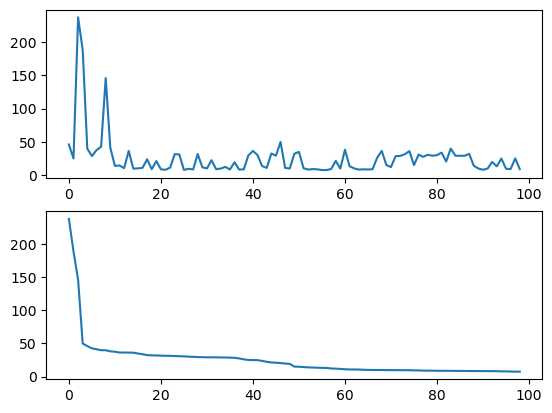

In [42]:
plt.subplot(211)
plt.plot(latency)
plt.subplot(212)
plt.plot(sorted(latency, reverse=True))
plt.show()

用排队论模型来拟合实测数据

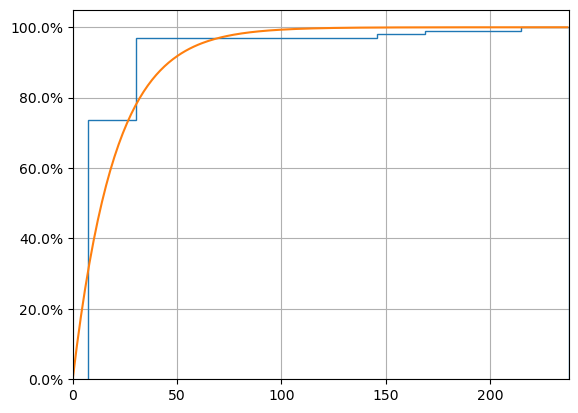

In [43]:
# 设置百分位纵轴
ax = plt.gca()
# ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=1))
# 避免横轴数据起始位置与纵轴重合，调整合适座标范围
x_min = max(min(latency) * 0.8, min(latency) - 5)
x_max = max(latency)
#plt.xlim(x_min, x_max)
plt.xlim(0, x_max)
# 绘制实际百分位延迟
plt.hist(latency, cumulative=True, histtype='step', weights=[1./ len(latency)] * len(latency))

# 排队论模型
# F(t)=1-e^(-1*a*t)
μ_minus_λ = 0.05
X_qt = np.arange(0, x_max, 1.)
Y_qt = 1 - np.exp(-1 * μ_minus_λ * X_qt)
# 绘制排队论模型拟合
plt.plot(X_qt, Y_qt)

plt.grid()
plt.show()